<a href="https://colab.research.google.com/github/Kyveli-tsioli/hello-world/blob/main/Copy_of_07_01_%E2%80%93_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation cell
# Run this once and then refresh this page to switch to iJulia
%%shell
if ! command -v julia 2>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.0/julia-1.0.5-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'

In [ ]:
using Pkg

pkg"add Interact"
pkg"add NamedArrays"
pkg"add Plots"
pkg"add Reactive"

pkg"precompile"

using Interact
using NamedArrays
using Plots
using Reactive

using LinearAlgebra
using Random
using IJulia

# Optimisation #

## The Loss Function ##

The **loss function** (also referred to as cost function or error function) is some function we define between our ground truth labels ($y$) and the model's predictions ($\hat{y}$ – which themselves are functions of the inputs $x$ parameterised by the set of parameters $\mathbf{\theta}$) giving an scalar output.

Having a **scalar measure of model performance** makes the concept of optimisation through minimisation of the loss function convenient.

Formally, the loss function maps multiple inputs into a single output.

$$ f(x) : \mathbb{R}^n \to \mathbb{R} $$

And the objective of minimisation is to find the values of $x$ which correspond to the lowest output of the function (often denoted $\mathbf{x}^*$) such that:

$$ x^* = arg\min f(x) $$

For most pursposes our $f$ will depend on some parameters $w$ and $b$, but let us ignore than for now.

## Example: Quadratic Function

Let us take an example using a simple quadratic function: $f(x) = x^2$

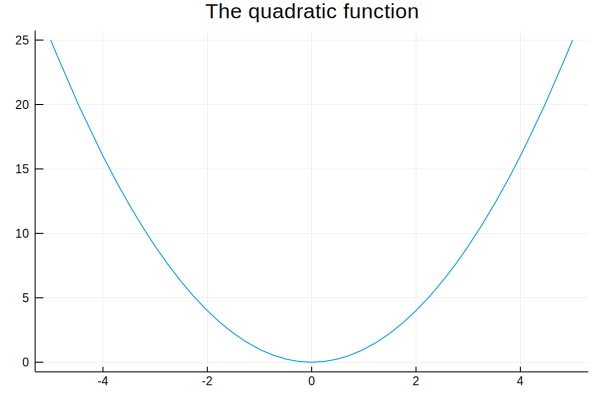

In [ ]:
f(x) = x^2
plot(f, title="The quadratic function", legend=:none)



#cost function, loss function, active function cost optimisation function
#function relative to truth labels (values)
#takes predictions, theta: denotes model parameters(weights and biases,) NOT hyperparameters 
#what theta gives the smallest loss in our model given the data


Also recall that the optimum can be found by setting the first derivative to $0$.

$$ f'(x) = 0 $$
$$ f'(x^2) = 2x \implies 2x = 0 $$
$$ x = 0$$

This means that the minimum value for the function $f(x) = x^2$ occurs when $x$ is $0$ (as we can clearly see above).

*Additional Info:* This approach is a first-order method. Second-order methods also make use of information about the curvature of the function (second derivative), however, they require the function to be twice differentiable.

But, the quadratic function has a very convenient property. It is **convex**.

A convex function is one for which for any two points taken along the function, the line between these points always lies above or on the curve.

<img src="https://www.math24.net/wp-content/uploads/2018/10/convex-downward-function.svg" height ="240" />

[Image source](https://www.math24.net/convex-functions/)


We could imagine a similarly convex loss function in higher dimensions.

![alt text](https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/gradient-descent-convex-function.png)

[Image source](https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/gradient-descent-convex-function.png)

But, most loss functions are not convex – in particular in the context of neural networks. What do we do then?

## Gradient-Based Optimization

The **first-order derivative** of a function $f(x)$ gives the slope of $f(x)$ at the point $x$.

We can use this information to minimise a function by travelling a small distance in a direction opposite to the derivative (because the derivative vector points "uphill").

This technique is known as **gradient descent**.

### Gradient Descent for Quadratic Function

We start off at some random location on the function – essentially, a guess. Say $x = 7$.


In [ ]:
xinit = 7


#convex function: there is a global unique minima
#not convex functions in general: use gradient-based optimisation
#take the first derivative:take the slope
#xinit is random

7

Since we know how to compute the gradient for this function, let's define a derivative function for convenience.

In [ ]:
fprime(x) = 2x;
#compute the gradient 

Then, we can apply this function to get the gradient at the point where $x$ is $7$.

In [ ]:
gradinit = fprime(xinit)
#apply the function at this specific point

14

Let us see what this looks like if we plot it alongside our function.

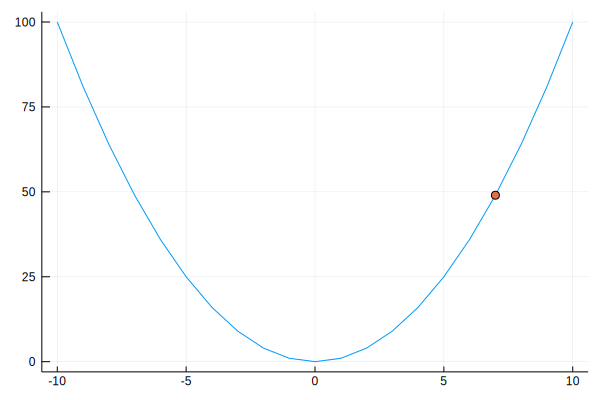

In [ ]:
plt = plot(f, -10:10)
scatter!(plt, [xinit], [f(xinit)], legend=:none)
#plot the point along the function

Now, **gradient descent** suggests that we should move our current point in the direction opposite to the gradient (i.e. in the direction of the **negative gradient**) as we want to move "downhill".

In [ ]:
xnew = xinit - gradinit
#gradient descent: take our original x(=7) take the gradient, and subtract (to do the "descent")
#mirror the position, another point with equally high loss 
#learning rate: "epsilon", alpha (usually), lamda
#positive scalar: think of it as a step size 
#between 0 and 1 [0,1]
#in practice: starts from 0.1, (1/100) a good initial guess 
#current x - gradient multiplied by our learning rate 


-7

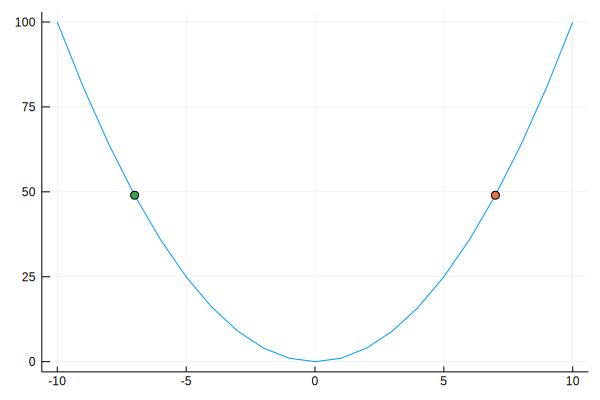

In [ ]:
plt = plot(f, -10:10)
plt = scatter!(plt, [xinit], [f(xinit)])
scatter!(plt, [xnew], [f(xnew)], legend=:none)


#big learning rate: balance across the different points on the other side (mirrored points)
#small: takes much time to converge 

We still seem to be the same distance from the minimum. Something doesn't seem right. In fact, there is a very important concept we still need to introduce called the **learning rate**.

The **learning rate** ($\epsilon$, also found as $\alpha$ or $\lambda$) is a positive scalar which determines how much we move in the direction of the negative gradient, also known as the step size.

$$ \epsilon \in [0, 1] $$

In practice learning rates tend be in the range $[0.1, 0.0001]$, a good initial guess tends to be $0.001$.

A step of gradient descent can be given as:

$$ x^\prime = x - \epsilon \nabla_x f(x)$$

Since we are usually interested in finding the optimal model parameters $\mathbf{\theta}$ that minimise the loss function, $L(\mathbf{\theta})$, it makes sense to define gradient descent in these terms:

$$ \theta^\prime = \theta - \epsilon \nabla_\theta L(\mathbf{\theta})$$

The **learning rate** can have a large effect on whether the iterative process of gradient descent converges, and how quickly it does if so.

![alt text](https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/gradient-descent-learning-rate.png)

[Image source](https://builtin.com/sites/default/files/styles/ckeditor_optimize/public/inline-images/gradient-descent-learning-rate.png)

We also want to know when to stop iterating. We do this by defining a **precision** which is a small value representing the smallest amount of change between the current and previous values for which we would consider the process to have converged.

In [ ]:
learningrate = 0.01
precision = 0.00001

curx             = xinit
previousstepsize = 1.0
curstep          = 0
while previousstepsize > precision
    newx              = curx - learningrate*fprime(curx)
    previousstepsize  = abs(newx - curx)  # absolute difference between the previous and current x values
    curx              = newx
    curstep          += 1
end

print("The local minimum occurs at $(curx). Converged after $(curstep) steps.");


#how to know when we should stop running
#convergence: actually have a local minima
#for deep learning: this is rare (to know you have found even a local minima)
#measure the precision (defined a learning rate)
#set the current x, previous step size (=magnitute of the previous gradient step)
#if the previous step larger than precision -> continue
#increase the number of steps
#learning rate scheduler
#converged in 474 steps: epoch:  1 parse through your entire training data
#you observed each and every one of the training data only once
#train until your validation loss increases for x epochs  (3 or 5)
#if that happens, you pick parameters at what they were in your minimum 

The local minimum occurs at 0.0004855767882775298. Converged after 474 steps.

We can see that this is indeed very close to the minimum value of $x = 0$. Let us try changing the **learning rate** and see how that affects the minimum value and convergence rate.

Machine learning practitioners use other stopping critera than precission when training their models. Why? What are these?

Let us visualise a few steps of gradient descent in action.

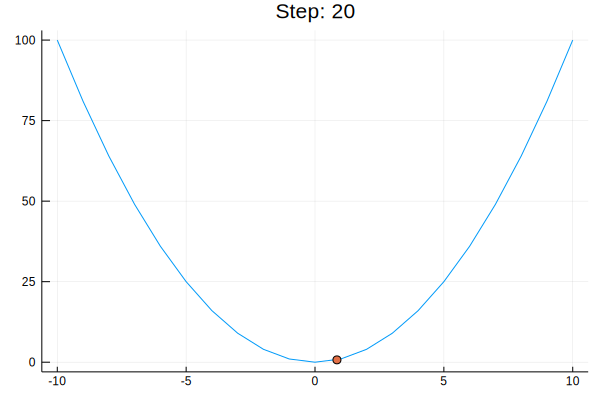

In [ ]:
numsteps = 20
learningrate = 0.95  # Change this and see what happens!

curx = xinit
for i = 1:numsteps
    newx = curx - learningrate*fprime(curx)
    IJulia.clear_output(true)
    plt = plot(f, -10:10)
    scatter!(plt, [newx], [f(newx)], legend=:none)
    title!(plt, "Step: $i") |> IJulia.display
    curx = newx
    sleep(0.5)
end


#in practice you dont know when you are in a saddle point
#jumping back and forth
#keep fixed the learning rates between epochs 
#linear decay
#it changes all the time
#which optimizers, regularisation and learning rates are essential for each domain
#green: converge but not inrease :regularisation 
#good learning rate: fairly abrupt in the begining and then flattens
#even for the good learning rate: not converge to 0
#really rare that you manage to fit your data entirely!

Try varying the learning rate and seeing what happens! Hopefully this should help you form an intuition of how the learning rate should be selected. The learning rate is also affected by your choice of optimiser.

<img src="https://cs231n.github.io/assets/nn3/learningrates.jpeg" />

[Image Source](https://cs231n.github.io/neural-networks-3/)

In the above example, our loss function had a single input. For functions with multiple inputs, we compute the **partial derivative** of the function with respect to each of the inputs (as we did yesterday for logistic regression). The **gradient** of $f$ is the **vector containing all of the partial derivatives**, denoted $\nabla_\mathbf{x} f(\mathbf{x})$.

## Variations of Gradient Descent ##
### Batch Gradient Descent ##

What we have described so far (and used in our last lecture) is known as “vanilla” or batch gradient descent. That is, we calculate the gradient of the loss function with respect to the model parameters $\theta$ for the entire training set. Every iteration that the model is exposed to the full training data is known as a **training epoch**.

This is inconvenient, especially for very large datasets which may not fit entirely into memory. It also means that if a new data point is added, the optimisation needs to start from scratch.

### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent is the other extreme. We sample one training example $(x_i, y_i)$ from the entire training set at a time and **perform an update** for each one.

Essentially, we are using the gradient for each training example as an approximation of the gradient across our entire data distribution. This can create large fluctuations but offers the advantages that one data example will (hopefully) always fit in memory, and it creates the possibility of *online* learning (we can continue optimising as more data points come in).

![](https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png)

Example of heavy loss fluctuations with SGD.

[Image source](https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png)

### Mini-Batch Gradient Descent ###

Mini-batch gradient descent combines the previous two approaches. The training dataset is divided into some number of batches, usually determined by first setting a **batch size**. Batch size can vary depending on the application and how memory-intensive it is. It typically ranges from $8$ (for a large model with many parameters) to $1024$ and above.

As a general rule of thumb, you want to select a batch size as large as possible (to provide the smoothest gradients). On a CPU you can for most cases fit your entire dataset into RAM, however, this leads to batch gradient descent and slow clock-time convergence unless your entire batch can be processed in parallel. On a GPU your entire batch can (effectively) be processed in parallel, thus it is safe to increase the batch size until your GPU runs out of memory – no, really, this is how every practitioner I know from DeepMind senior to MSc project student does it.

## Momentum and Advanced Optimisers
The SGD optimiser (from now on used to refer to mini-batch gradient descent, as it is what is the de-facto standard) struggles in areas of the loss surface where it is relatively flat along one dimension, but quite steep along another. These locations are known as **ravines**.

Since SGD travels in the direction of steepest curvature, it continues to oscillate between the steepest slopes of the ravine.

**Momentum** accelerates learning and helps overcome this effect by encouraging travel in the same direction as the previous update. It is analagous to momentum in physics, with unit mass, and is therefore represented by a velocity vector $\mathbf{v}$. There are also a clear analogy to rolling averages.

Concretely, a new momentum term $\alpha$ is added (usually with a value around $0.9$) which determines how much of the previous velocity vector to retain.

The update is:
$$ \mathbf{v} \leftarrow \alpha \mathbf{v} - \epsilon \nabla_\theta L(\mathbf{\theta})$$
$$ \mathbf{\theta} \leftarrow \mathbf{\theta} + \mathbf{v} $$

In [ ]:
learningrate        = 0.01
momentumcoefficient = 0.9
precision           = 0.00001

curx = xinit
curv = 0

previousstepsize = 1.0
curstep          = 0
while previousstepsize > precision
    newv              = momentumcoefficient*curv - learningrate*fprime(curx)
    newx              = curx + newv
    previousstepsize  = abs(newx - curx) # absolute difference between the previous and current x values
    curx              = newx
    curv              = newv
    curstep          += 1
end

print("The local minimum occurs at $(curx). Converged after $(curstep) step(s).");



#batch gradient descent: take a subset of the entire data (of 5, of 10->hyperparameter)
#calculate on the entire data (full batch) gives the true gradient with respect of the data 
#stochastic gradient descent: in practice when you use a single sample-not used in practice loss function, jagged up and down movements in the loss 
#gives bad loss-> few people use stoch grad descent in practice 
#in practice they use mini-batch gradient descent: 
#advantages of full badge: you take the real gradient 
#poor conververgence which?
#randomise each and every single epoch 
#how to set the batch size: google in particular 
#models are so big that you cannot increase your batch sizes
#a single sample on a single gpu: do gradient aggregation: sum gradients until you have a mini batch and then update
#set a batch size: as large as possible (set by increase until you run out of memory on the gpu and get an error)
#try to run the model and see if you run out of memory
#hyperparametrs in practice: 

#momentum: "planes"
#ravines: back and forth, momentum towards the end of the ravine when you have slope
#momentum: it encourages you to preserve some of the previous gradient steps
#second order estimate (think of it like)
#get over the planes, ravine: stop back and forth and get out of it
#optimisation methods (straightforward in terms of maths)
#alpha (0.9) we preserving 0.9 of our previous updates
#we create this velocity vector: v prime by taking momentum term multiplied by previous v and subtract 
#we cut the number of updates to a quarter 
#momentum is very common
#more advanced methods
#sgd,momentum,nag,adagrad etc: momentum based methods that try to recover gradient 
#situations without 'ravines'->momentum
#adadelta goes much faster when it is on curvature
#velocity vector: lies in the same dimensions as your parameters (theta)
#we retain 0.9 of the previous gradient and we add sth
#problem: velocity becomes larger and larger
#you can overshoot the local minimum



The local minimum occurs at -0.01552385691405029. Converged after 116 step(s).

We can see that even for this simple example, achieving convergence in $116$ steps instead of the $474$ it took without momentum is quite an improvement.

Let's visualise a few steps of gradient descent with momentum action.

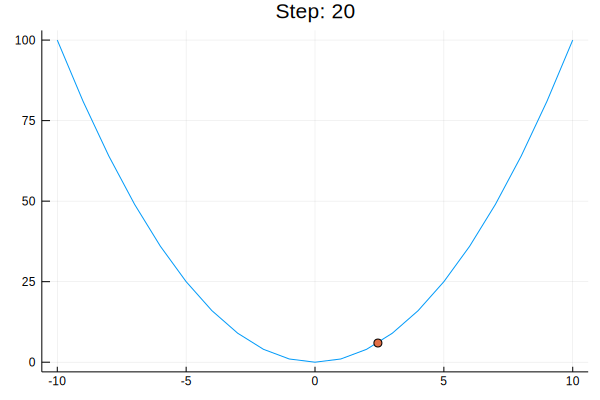

In [ ]:
numsteps            = 20
learningrate        = 0.95 # Change this and see what happens!
momentumcoefficient = 0.9  # Change this and see what happens!

curx = xinit
curv = 0
for i = 1:numsteps
    newv = momentumcoefficient*curv - learningrate * fprime(curx)
    newx = curx + newv
    IJulia.clear_output(true)
    plt = plot(f, -10:10)
    scatter!(plt, [newx], [f(newx)], legend=:none)
    title!(plt, "Step: $i") |> IJulia.display
    curx = newx
    curv = newv
    sleep(0.5)
end

What would be the effect of setting the momentum coefficient $\alpha$ to $0$?

![](https://i.stack.imgur.com/1obtV.gif)

![](https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif)

[Image Source](https://ruder.io/optimizing-gradient-descent/index.html#visualizationofalgorithms)

Further reading:

* Nesterov’s Acelerated Gradient (NAG)
* [AdaGrad](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#AdaGrad)
* [RMSProp](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp)
* AdaDelta, essentially RMSProp…
* [Adam](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)

In brief, NAG provides a parameter position estimate to the momentum term creating a “look-ahead” mechanism, while the latter four take different approaches to parameter-adaptive learning rates.

So, as a student, what should you use? With very very few exceptions Mini-batch SGD with Adam has become the “standard”, but it is not uncommon to use “vanilla” SGD at the time of developing an algorithm – why?


## Our Example Data (yet yet again)


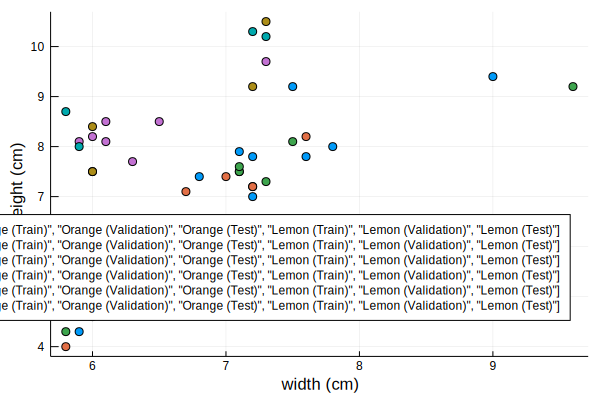

In [ ]:
run(`curl -fsS https://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/fruit_data -o /tmp/fruit_data.tsv`)
run(`curl -fsS https://homepages.inf.ed.ac.uk/imurray2/teaching/oranges_and_lemons/fruit_types.txt -o /tmp/fruit_types.txt`)

id2fruit = Dict{Int,Symbol}()
open("/tmp/fruit_types.txt") do f
    for l in eachline(f)
        idstr, description = split(l, limit=2)
        id = parse(Int, idstr)
        if occursin(r"orange"i, description) || occursin(r"mandarin"i, description)
            id2fruit[id] = :orange
        elseif occursin(r"lemon"i, description)
            id2fruit[id] = :lemon
        elseif occursin(r"apple"i, description)
            id2fruit[id] = :apple
        else
            error("Unable to detect fruit in descreption: \"$(description)\"")
        end
    end
end

labels  = Symbol[]
datatmp = Vector{Vector{Float64}}()
open("/tmp/fruit_data.tsv") do f
    for l in eachline(f)
        soup   = split(l, limit=4)
        fruit  = id2fruit[parse(Int, soup[1])]
        mass   = parse(Int, soup[2])
        height = parse(Float64, soup[3])
        width  = parse(Float64, soup[4])
        push!(labels, fruit)
        push!(datatmp, [mass, height, width])
    end
end
data = NamedArray(reduce(hcat, datatmp))
setdimnames!(data, "Attribute", 1)
setnames!(data, ["Mass", "Height", "Width"], 1)
setdimnames!(data, "Sample", 2)

run(`rm -f /tmp/fruit_data.tsv /tmp/fruit_types.txt`)
nothing

orangeidx = findall(x -> x == :orange, labels)
lemonidx  = findall(x -> x == :lemon, labels)

shuffle!(orangeidx)
orangetrainidx = orangeidx[1:Int(round(length(orangeidx)*(3/6)))]
orangevalidx = orangeidx[length(orangetrainidx):length(orangetrainidx) + Int(round(length(orangeidx)*(1/6)))]
orangetestidx = orangeidx[length(orangetrainidx) + length(orangevalidx) + 1:end]
@assert length(orangetrainidx) + length(orangevalidx) + length(orangetestidx) == length(orangeidx)

shuffle!(lemonidx)
lemontrainidx = lemonidx[1:Int(round(length(lemonidx)*(3/6)))]
lemonvalidx = lemonidx[length(lemontrainidx):length(lemontrainidx) + Int(round(length(lemonidx)*(1/6)))]
lemontestidx = lemonidx[length(lemontrainidx) + length(lemonvalidx) + 1:end]
@assert length(lemontrainidx) + length(lemonvalidx) + length(lemontestidx) == length(lemonidx)

scatter(
    [data["Height", orangetrainidx], data["Height", orangevalidx],
        data["Height", orangetestidx], data["Height", lemontrainidx],
        data["Height", lemonvalidx], data["Height", lemontestidx]],
    [data["Width", orangetrainidx], data["Width", orangevalidx],
        data["Width", orangetestidx], data["Width", lemontrainidx],
        data["Width", lemonvalidx], data["Width", lemontestidx]],
    labels=["Orange (Train)", "Orange (Validation)", "Orange (Test)",
            "Lemon (Train)", "Lemon (Validation)", "Lemon (Test)"],
        xlabel="width (cm)", ylabel="height (cm)", legend=:bottomright)

In [ ]:
# Define logistic function and derivative
logistic(x)      = 1/(1 + exp(-x))
logisticprime(x) = logistic(x)*(1 - logistic(x));

In [ ]:
mutable struct LogisticRegression
    w ::Vector{Float64}
    b ::Float64
end
LogisticRegression(d)       = LogisticRegression(zeros(d), 0)
f(m::LogisticRegression, x) = logistic(dot(m.w, x) + m.b)
p(m::LogisticRegression, x) = f(m, x) >= 0.5

mlogreg = LogisticRegression(2)

function accuracy(oidx, lidx, m)
    correct = 0
    for i in oidx
        p(m, data[["Height", "Width"], i]) || continue
        correct += 1
    end
    for i in lidx
        !p(m, data[["Height", "Width"], i]) || continue
        correct += 1
    end
    correct/(length(oidx) + length(lidx))*100
end

@show accuracy(orangetrainidx, lemontrainidx, mlogreg)
@show accuracy(orangevalidx, lemonvalidx, mlogreg)
@show accuracy(orangetestidx, lemontestidx, mlogreg)

accuracy(orangetrainidx, lemontrainidx, mlogreg) = 60.0
accuracy(orangevalidx, lemonvalidx, mlogreg) = 55.55555555555556
accuracy(orangetestidx, lemontestidx, mlogreg) = 63.63636363636363


63.63636363636363

In [ ]:
batchsize           = 8
learningrate        = 0.01
momentumcoefficient = 0.9

batchify(x, n) = [x[i:min(i + n - 1, length(x))] for i in 1:n:length(x)]
let m = mlogreg
    bestm   = deepcopy(m)
    bestacc = 0.0

    epochs = 50
    for iteration in 1:epochs
        trainingdata = shuffle(vcat(orangetrainidx, lemontrainidx))  # We shuffle at every epoch

        # Define mini-batches
        batches = batchify(trainingdata, batchsize)

        # Process and update per mini-batch
        for batch in batches
            gradm = deepcopy(m)
            fill!(gradm.w, 0)
            gradm.b = 0

            # Process batch
            for i in batch
                x            = data[2:3, i]
                isorange     = i in orangeidx
                y            = isorange ? 1 : 0
                yprime       = f(m, x)
                gradm.w[:] .-= x*(yprime - y)
                gradm.b     -= yprime - y
            end

            gradm.w ./= length(batch)
            gradm.b  /= length(batch)

            m.w .+= learningrate*gradm.w
            m.b  += learningrate*gradm.b
        end

        @show iteration currentvalacc = accuracy(orangevalidx, lemonvalidx, m)
        currentvalacc > bestacc || continue
        bestm   = deepcopy(m)
        bestacc = currentvalacc
    end

    m.w[:] = bestm.w[:]
    m.b    = bestm.b;
end

@show accuracy(orangetrainidx, lemontrainidx, mlogreg)
@show accuracy(orangevalidx, lemonvalidx, mlogreg)
@show accuracy(orangetestidx, lemontestidx, mlogreg);

iteration = 1
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 2
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 3
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 4
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 5
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 6
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 7
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 8
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 9
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 10
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 55.55555555555556
iteration = 11
currentvalacc = accuracy(orangevalidx, lemonvalidx, m) = 77.77777777777779
iteration = 12
curr

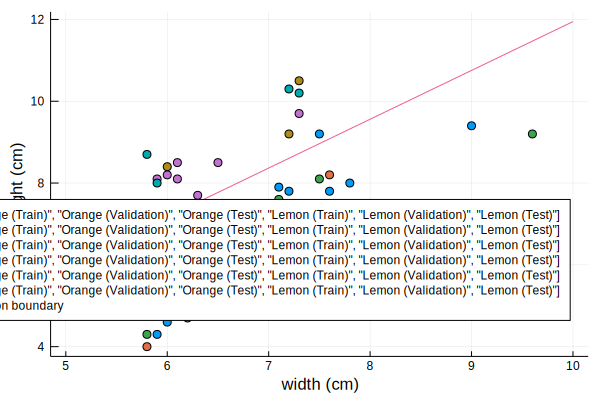

In [ ]:
plt = scatter(
    [data["Height", orangetrainidx], data["Height", orangevalidx],
        data["Height", orangetestidx], data["Height", lemontrainidx],
        data["Height", lemonvalidx], data["Height", lemontestidx]],
    [data["Width", orangetrainidx], data["Width", orangevalidx],
        data["Width", orangetestidx], data["Width", lemontrainidx],
        data["Width", lemonvalidx], data["Width", lemontestidx]],
    labels=["Orange (Train)", "Orange (Validation)", "Orange (Test)",
            "Lemon (Train)", "Lemon (Validation)", "Lemon (Test)"],
        xlabel="width (cm)", ylabel="height (cm)", legend=:bottomright)
let m = mlogreg
    k = -(m.b/m.w[2])/(m.b/m.w[1])
    d(x) = k*x + (-m.b/m.w[2])
    plot!(deepcopy(plt), d, 5:10, label="Decision boundary")
end